In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
### BALANCE

df_balance = pd.read_csv('balance-electrico-limpio.csv')
df_balance

fecha       valor             tipo    energia      region
0      2019-01-01   53.722120       Hidráulica  Renovable  peninsular
1      2019-01-02   61.294768       Hidráulica  Renovable  peninsular
2      2019-01-03   82.981951       Hidráulica  Renovable  peninsular
3      2019-01-04   94.301940       Hidráulica  Renovable  peninsular
4      2019-01-05   58.822692       Hidráulica  Renovable  peninsular
...           ...         ...              ...        ...         ...
49638  2024-12-27  675.212456  Demanda en b.c.    Demanda  peninsular
49639  2024-12-28  641.243762  Demanda en b.c.    Demanda  peninsular
49640  2024-12-29  618.610074  Demanda en b.c.    Demanda  peninsular
49641  2024-12-30  690.745398  Demanda en b.c.    Demanda  peninsular
49642  2024-12-31  665.712737  Demanda en b.c.    Demanda  peninsular

[49643 rows x 5 columns]

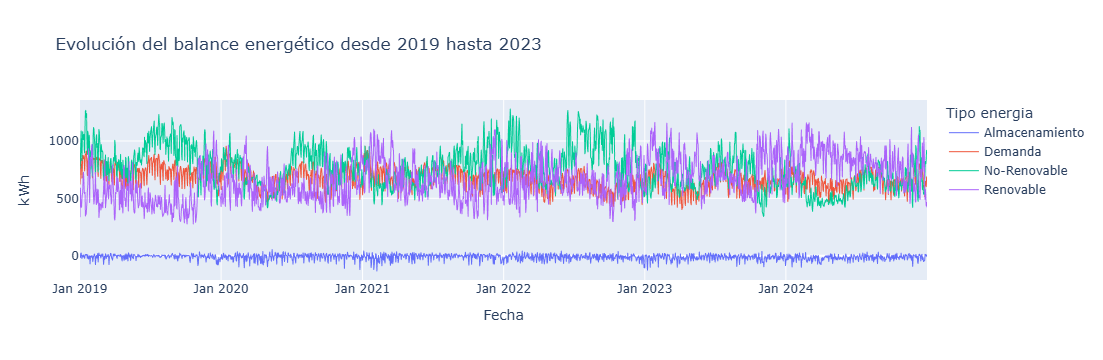

In [5]:
grafico_lineas = df_balance.groupby(['fecha', 'energia'])['valor'].sum().reset_index()
fig = px.line(grafico_lineas,
              x='fecha',
              y='valor',
              color='energia',
              title="Evolución del balance energético desde 2019 hasta 2023",
              labels={'fecha': 'Fecha', 'energia': 'Tipo energia'})
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Fecha', xaxis_tickformat='%b %Y', yaxis_title='kWh')
fig.show()

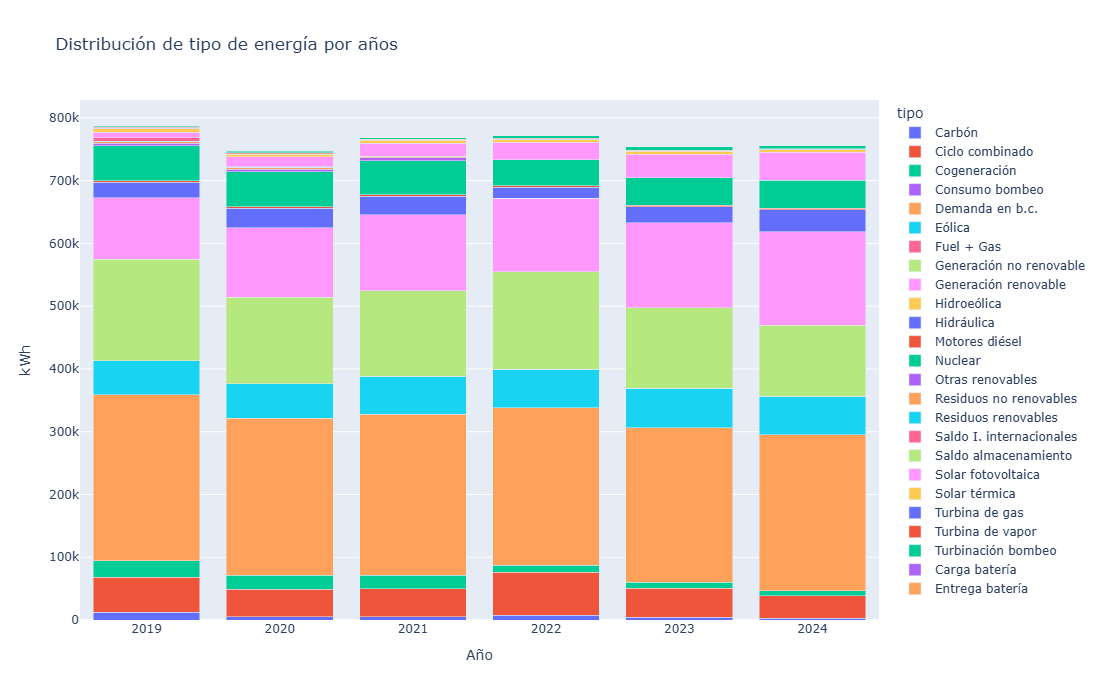

In [7]:
df_balance['fecha'] = pd.to_datetime(df_balance['fecha'])
df_balance['año'] = df_balance['fecha'].dt.year

grafico_barras = df_balance.groupby(['año', 'tipo'])['valor'].sum().reset_index()

fig = px.bar(grafico_barras,
             x='año',
             y='valor',
             color='tipo',
             title="Distribución de tipo de energía por años",
             labels={'valor': 'kWh', 'año': 'Año'},
             hover_data={'valor': ':.2f'},
             barmode='stack')
fig.update_layout(height=700)
fig.show()

In [9]:
### DEMANDA

df_demanda = pd.read_csv('demanda-limpio.csv')
df_demanda

fecha       valor indicador      region   año
0     2019-01-01  582.949806   Demanda  peninsular  2019
1     2019-01-02  742.199407   Demanda  peninsular  2019
2     2019-01-03  787.764963   Demanda  peninsular  2019
3     2019-01-04  796.010035   Demanda  peninsular  2019
4     2019-01-05  721.029651   Demanda  peninsular  2019
...          ...         ...       ...         ...   ...
1456  2022-12-27  612.141492   Demanda  peninsular  2022
1457  2022-12-28  629.989307   Demanda  peninsular  2022
1458  2022-12-29  637.184984   Demanda  peninsular  2022
1459  2022-12-30  624.064594   Demanda  peninsular  2022
1460  2022-12-31  559.754852   Demanda  peninsular  2022

[1461 rows x 5 columns]

In [11]:
df_ire = pd.read_csv('ire-limpio.csv')
df_ire

fecha    valor  porcentaje                   indicador      region  \
0    2019-01-01  123.969    0.541252              Índice general  peninsular   
1    2019-02-01  114.805    0.516888              Índice general  peninsular   
2    2019-03-01  126.515    0.541843              Índice general  peninsular   
3    2019-04-01  119.432    0.532477              Índice general  peninsular   
4    2019-05-01  130.280    0.552359              Índice general  peninsular   
..          ...      ...         ...                         ...         ...   
355  2023-08-01   88.288    0.395428  Índice servicios corregido  peninsular   
356  2023-09-01   97.093    0.443604  Índice servicios corregido  peninsular   
357  2023-10-01   97.330    0.450424  Índice servicios corregido  peninsular   
358  2023-11-01  101.347    0.481843  Índice servicios corregido  peninsular   
359  2023-12-01  101.462    0.478013  Índice servicios corregido  peninsular   

      año  
0    2019  
1    2019  
2    2019  
3    2019  
4    2019  
..    ...  
355  2023  
356  2023  
357  2023  
358  2023  
359  2023  

[360 rows x 6 columns]

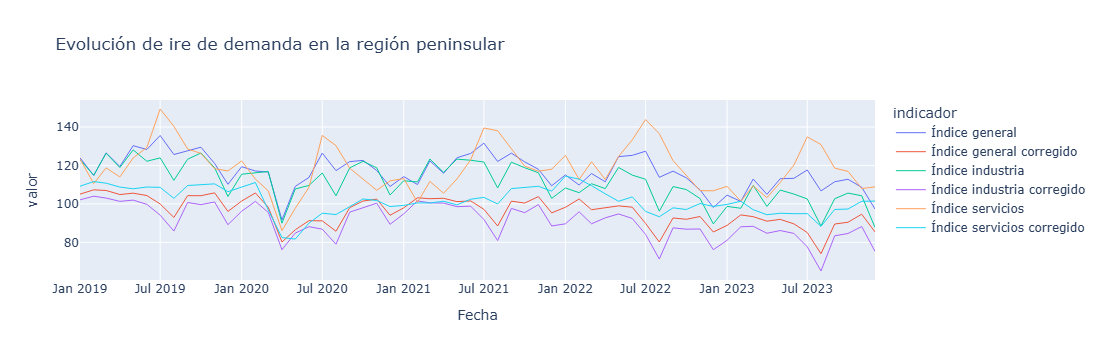

In [13]:
grafico_lineas = df_ire.groupby(['fecha', 'indicador'])['valor'].sum().reset_index()
fig = px.line(grafico_lineas,
              x='fecha',
              y='valor',
              color='indicador',
              title="Evolución de ire de demanda en la región peninsular",
              labels={'fecha': 'Fecha', 'energia': 'Wh', 'tipo energia': 'Tipo de energía'})
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Fecha', xaxis_tickformat='%b %Y')
fig.show()

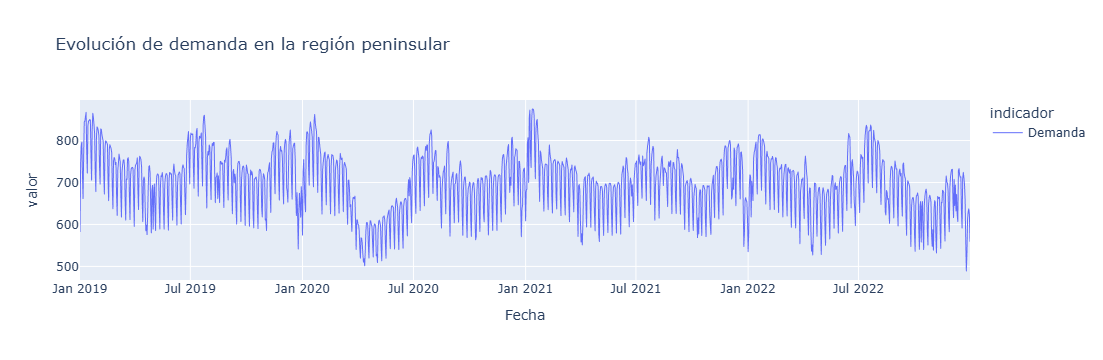

In [15]:
grafico_lineas = df_demanda.groupby(['fecha', 'indicador'])['valor'].sum().reset_index()
fig = px.line(grafico_lineas,
              x='fecha',
              y='valor',
              color='indicador',
              title="Evolución de demanda en la región peninsular",
              labels={'fecha': 'Fecha', 'energia': 'Wh', 'tipo energia': 'Tipo de energía'})
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Fecha', xaxis_tickformat='%b %Y')
fig.show()

In [17]:
filtro = df_ire['indicador'].isin(['Índice general corregido', 'Índice industria corregido', 'Índice servicios corregido'])
df_filtrado = df_ire[filtro]

df_agrupado = df_filtrado.groupby(['año', 'indicador'])['valor'].sum().reset_index()

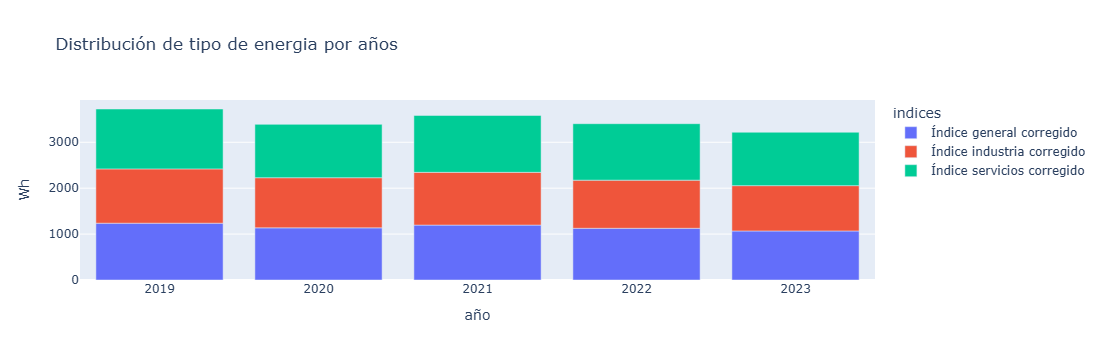

In [19]:
grafico_barras = df_agrupado.groupby(['año', 'indicador'])['valor'].sum().reset_index()

fig = px.bar(grafico_barras,
             x='año',
             y='valor',
             color='indicador',
             title="Distribución de tipo de energia por años",
             labels={'valor': 'Wh', 'indicador': 'indices'})
fig.show()

In [21]:
### GENERACION:
df_generacion = pd.read_csv('estructura-generacion-limpio.csv')
df_generacion

fecha      valor  porcentaje            indicador      region  \
0      2019-01-01  53.722120    0.097735           Hidráulica  peninsular   
1      2019-01-02  61.294768    0.086331           Hidráulica  peninsular   
2      2019-01-03  82.981951    0.115989           Hidráulica  peninsular   
3      2019-01-04  94.301940    0.125121           Hidráulica  peninsular   
4      2019-01-05  58.822692    0.086633           Hidráulica  peninsular   
...           ...        ...         ...                  ...         ...   
32902  2024-12-27   2.802039    0.004011  Residuos renovables  peninsular   
32903  2024-12-28   2.888139    0.004415  Residuos renovables  peninsular   
32904  2024-12-29   2.848496    0.004456  Residuos renovables  peninsular   
32905  2024-12-30   2.710827    0.003921  Residuos renovables  peninsular   
32906  2024-12-31   2.742817    0.004180  Residuos renovables  peninsular   

            tipo   año  
0      Renovable  2019  
1      Renovable  2019  
2      Renovable  2019  
3      Renovable  2019  
4      Renovable  2019  
...          ...   ...  
32902  Renovable  2024  
32903  Renovable  2024  
32904  Renovable  2024  
32905  Renovable  2024  
32906  Renovable  2024  

[32907 rows x 7 columns]

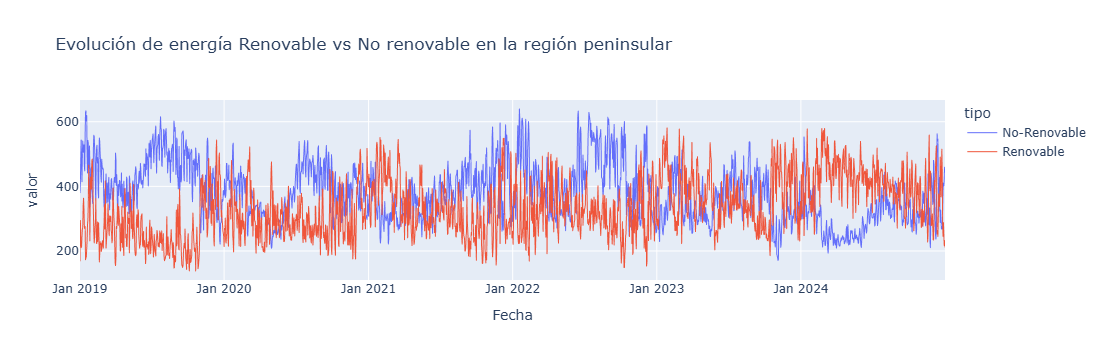

In [23]:
grafico_lineas = df_generacion.groupby(['fecha', 'tipo'])['valor'].sum().reset_index()
fig = px.line(grafico_lineas,
              x='fecha',
              y='valor',
              color='tipo',
              title="Evolución de energía Renovable vs No renovable en la región peninsular",
              labels={'fecha': 'Fecha', 'energia': 'kWh', 'tipo energia': 'Tipo de energía'})
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Fecha', xaxis_tickformat='%b %Y')
fig.show()

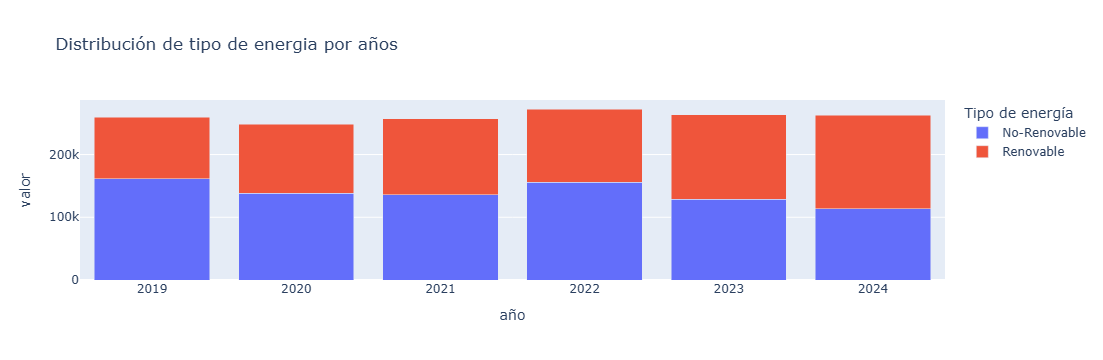

In [25]:
grafico_barras = df_generacion.groupby(['año', 'tipo'])['valor'].sum().reset_index()

fig = px.bar(grafico_barras,
             x='año',
             y='valor',
             color='tipo',
             title="Distribución de tipo de energia por años",
             labels={'energia': 'kWh', 'tipo': 'Tipo de energía'},
             hover_name='tipo',
             barmode='stack')
fig.show()

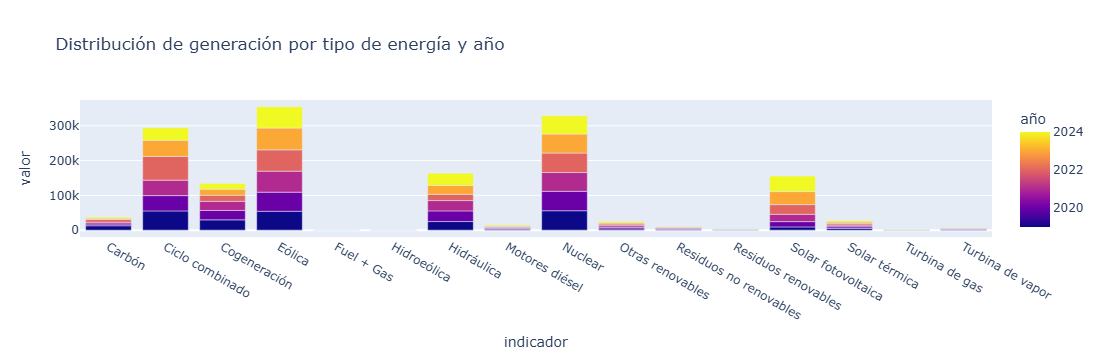

In [27]:
grafico_hist = df_generacion.groupby(['indicador', 'año'])['valor'].sum().reset_index()

fig = px.bar(grafico_hist,
             x='indicador',
             y='valor',
             color='año',  
             title='Distribución de generación por tipo de energía y año',
             barmode='group')
fig.show()

In [29]:
### INTERCAMBIO:

df_intercambio = pd.read_csv('fronteras-limpio.csv')
df_intercambio

valor  porcentaje       fecha              pais   año
0     -0.208239    0.003465  2019-01-01  francia-frontera  2019
1     -2.325553    0.036857  2019-01-02  francia-frontera  2019
2    -11.123719    0.243767  2019-01-03  francia-frontera  2019
3    -17.758093    0.397978  2019-01-04  francia-frontera  2019
4     -4.267317    0.102386  2019-01-05  francia-frontera  2019
...         ...         ...         ...               ...   ...
8763  -1.261830    1.000000  2024-12-27  andorra-frontera  2024
8764  -1.482480    1.000000  2024-12-28  andorra-frontera  2024
8765  -1.456660    1.000000  2024-12-29  andorra-frontera  2024
8766  -1.373690    1.000000  2024-12-30  andorra-frontera  2024
8767  -1.361540    1.000000  2024-12-31  andorra-frontera  2024

[8768 rows x 5 columns]

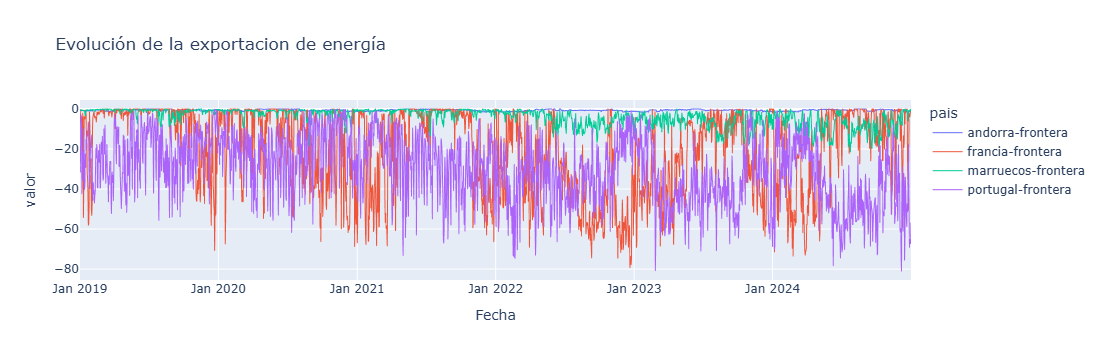

In [31]:

grafico_lineas = df_intercambio.groupby(['fecha', 'pais'])['valor'].sum().reset_index()
fig = px.line(grafico_lineas,
              x='fecha',
              y='valor',
              color='pais',
              title="Evolución de la exportacion de energía",
              labels={'fecha': 'Fecha', 'energia': 'kWh', 'tipo energia': 'Tipo de energía'})
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Fecha', xaxis_tickformat='%b %Y')
fig.show()

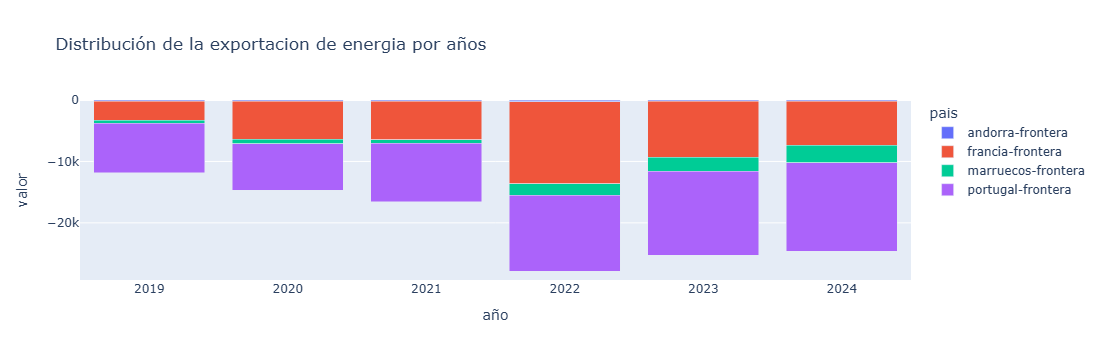

In [33]:
grafico_barras = df_intercambio.groupby(['año', 'pais'])['valor'].sum().reset_index()

fig = px.bar(grafico_barras,
             x='año',
             y='valor',
             color='pais',
             title="Distribución de la exportacion de energia por años",
             labels={'energia': 'kWh', 'pais': 'pais'},
             hover_name='pais',
             barmode='stack')
fig.show()

In [45]:
poblacion = {
        'francia-frontera': {
            2019: 67000000, 2020: 67100000, 2021: 67200000,
            2022: 67300000, 2023: 67400000, 2024: 67500000
        },
        'portugal-frontera': {
            2019: 10200000, 2020: 10250000, 2021: 10300000,
            2022: 10350000, 2023: 10400000, 2024: 10450000
        },
        'andorra-frontera': {
            2019: 77000, 2020: 77300, 2021: 77600,
            2022: 77900, 2023: 78200, 2024: 78500
        },
        'marruecos-frontera': {
            2019: 36000000, 2020: 36300000, 2021: 36600000,
            2022: 36900000, 2023: 37200000, 2024: 37500000
        }
        }

        # Filtrar solo países relevantes
paises_interes = list(poblacion.keys())
df_filtrado1 = df_intercambio[df_intercambio['pais'].isin(paises_interes)]

        # Agrupar energía exportada por país y año
energia_total = df_filtrado1.groupby(['pais', 'año'])['valor'].sum().reset_index()

        # Calcular exportación per cápita
def energia_per_capita(row):
    return row['valor'] / poblacion[row['pais']][row['año']]

energia_total['energia_per_capita'] = energia_total.apply(energia_per_capita, axis=1)
print(energia_total)


    

                  pais   año         valor  energia_per_capita
0     andorra-frontera  2019   -208.262190           -0.002705
1     andorra-frontera  2020   -196.145610           -0.002537
2     andorra-frontera  2021   -225.135090           -0.002901
3     andorra-frontera  2022   -285.652970           -0.003667
4     andorra-frontera  2023   -240.762220           -0.003079
5     andorra-frontera  2024   -235.614810           -0.003001
6     francia-frontera  2019  -3116.290037           -0.000047
7     francia-frontera  2020  -6192.458406           -0.000092
8     francia-frontera  2021  -6280.765213           -0.000093
9     francia-frontera  2022 -13379.618752           -0.000199
10    francia-frontera  2023  -9062.902980           -0.000134
11    francia-frontera  2024  -7093.005987           -0.000105
12  marruecos-frontera  2019   -434.931180           -0.000012
13  marruecos-frontera  2020   -706.610700           -0.000019
14  marruecos-frontera  2021   -509.392600           -0

In [47]:
energia_total.to_csv('energia_per_capita.csv', index=False)

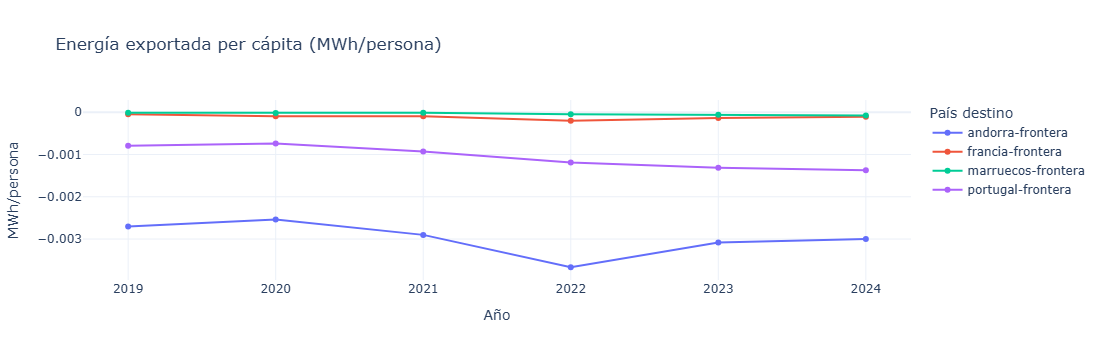

In [41]:
fig = px.line(
    energia_total,
    x="año",
    y="energia_per_capita",
    color="pais",
    markers=True,
    title="Energía exportada per cápita (MWh/persona)",
    labels={"energia_per_capita": "MWh/persona", "año": "Año", "pais": "País"}
)

fig.update_layout(
    legend_title_text="País destino",
    hovermode="x unified",
    template="plotly_white"
)

fig.show()